# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# 1. Get the total of rides for each city type
total_rides_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
Avg_fare_ride= total_fares_type/total_rides_type
Avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
Avg_fare_driver= total_fares_type/total_drivers_type
Avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_type,
                              "Total Drivers": total_drivers_type, 
                              "Total Fares": total_fares_type, 
                              "Average Fare per ride": Avg_fare_ride, 
                              "Average Fare per driver": Avg_fare_driver})
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per ride,Average Fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per ride,Average Fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
pyber_summary_df["Average Fare per ride"]=pyber_summary_df["Average Fare per ride"].map("${:,.2f}".format)

In [10]:
pyber_summary_df["Average Fare per driver"]=pyber_summary_df["Average Fare per driver"].map("${:,.2f}".format)

In [12]:
#8. Format DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per ride,Average Fare per driver
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
Fare_type_date_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
Fare_type_date_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
Fare_type_date_df = Fare_type_date_df.reset_index()

Fare_type_date_df.tail()

,type,date,fare
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77
2374,Urban,2019-05-08 13:10:18,18.04


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Fare_type_date_pivot = Fare_type_date_df.pivot(index="date", columns="type", values="fare")
Fare_type_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Fares_df= Fare_type_date_pivot.loc["2019-01-01":"2019-04-29"]
Fares_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Fares_df.index=pd.to_datetime(Fares_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
Fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Fares_df_week =Fares_df.resample("W").sum()
Fares_df_week.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [26]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
import matplotlib as mpl
import matplotlib.dates as mdate
import datetime

# Create the variables for x and y axis
date = list(Fares_df_week.index.values)
urban_fare_week = Fares_df_week["Urban"]
suburban_fare_week = Fares_df_week["Suburban"]
rural_fare_week = Fares_df_week["Rural"]

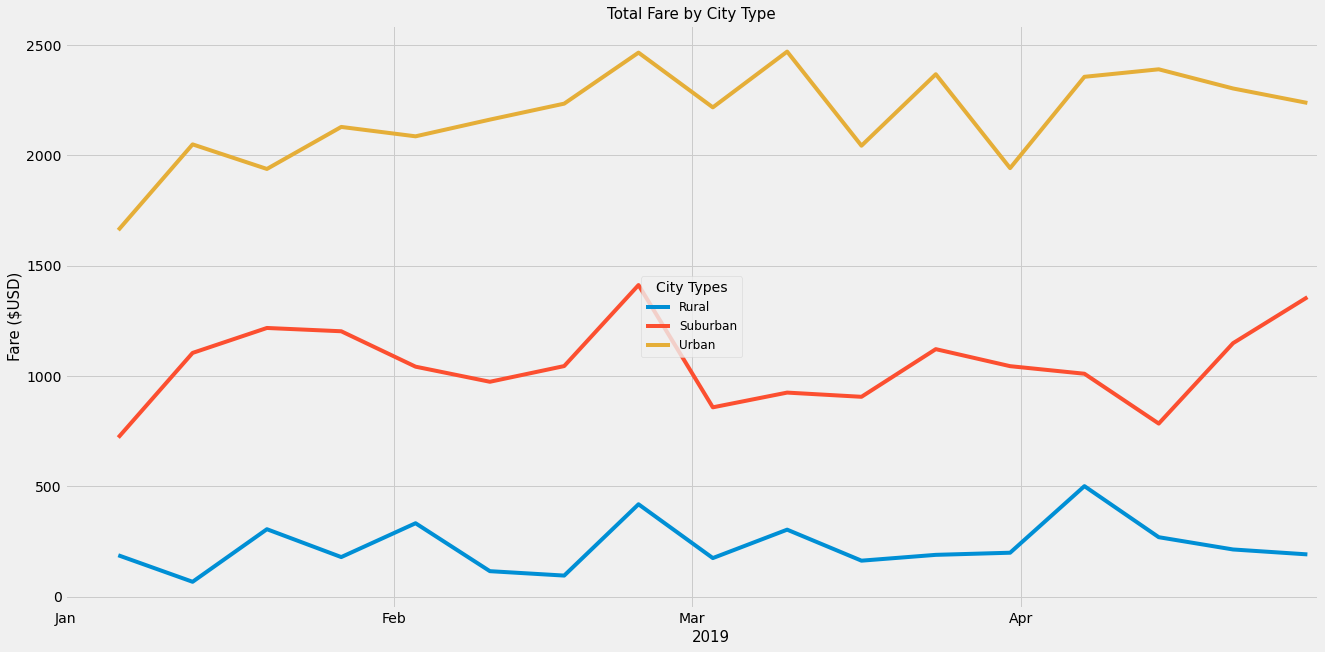

In [29]:
# Create the plot Create a Line Chart Using the MATLAB Method
plt.subplots(figsize=(20, 10))
plt.plot(date,rural_fare_week, label="Rural")
plt.plot(date,suburban_fare_week, label="Suburban")
plt.plot(date,urban_fare_week, label="Urban")

# Incorporate the other graph properties
plt.title("Total Fare by City Type", fontsize=15)
plt.ylabel("Fare ($USD)", fontsize=15)
plt.xlabel("2019", fontsize=15, ha="left")

# Adding the grid
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12",loc="center", title="City Types")

# Config the ticks. Set the locator
locator = mdate.MonthLocator()
frmtr = mdate.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(frmtr)

# set limits
plt.xlim([datetime.date(2019, 1, 1), datetime.date(2019, 4, 29)])

# Save the figure.
plt.savefig("Resources/PyBer_summary2.png", bbox_inches = 'tight')

# Show the plot
plt.show()

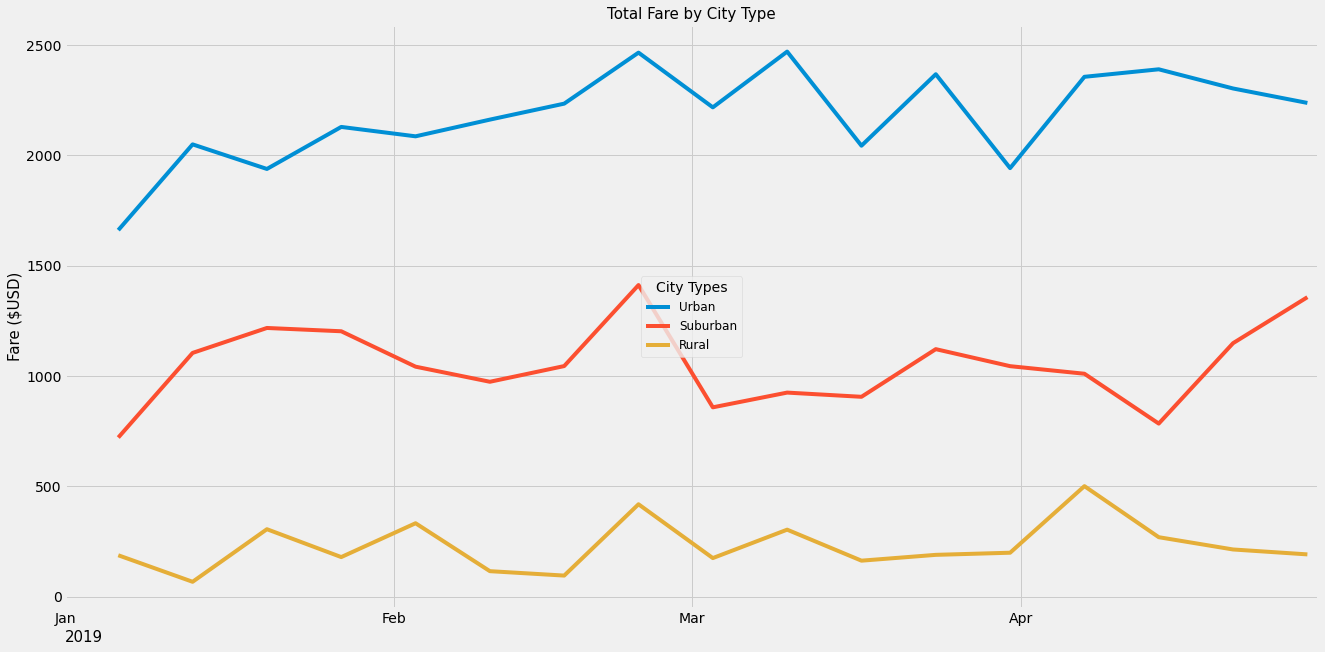

In [27]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.plot(date,urban_fare_week, label="Urban")
ax.plot(date,suburban_fare_week, label="Suburban")
ax.plot(date,rural_fare_week, label="Rural")

# Incorporate the other graph properties
ax.set_title("Total Fare by City Type", fontsize=15)
ax.set_ylabel("Fare ($USD)", fontsize=15)
ax.set_xlabel("2019", fontsize=15, loc="left")

# Adding the grid
ax.grid(True)

# Add the legend.
leg = ax.legend(fontsize="12",loc="center", title="City Types")

# Config the ticks. Set the locator
months = mdate.MonthLocator()  # every month
months_fmt = mdate.DateFormatter("%b")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

# set limits
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 4, 29)])

# Save the figure.
plt.savefig("Resources/PyBer_summary1.png",pad_inches=0.5)
plt.show()

In [30]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	PyBer_Challenge.ipynb
	Resources/

nothing added to commit but untracked files present (use "git add" to track)
